In [1]:
%matplotlib inline
import os
import struct
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets

In [2]:
import codecs

In [3]:
download =  datasets.MNIST('./MNIST/', train=True, download=True) 

In [4]:
Datapath = 'MNIST/raw/'

In [5]:
def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

In [6]:
def parse_byte(b):
    if isinstance(b, str):
        return ord(b)
    return b

In [7]:
def read_image_file(path):
    with open(path, 'rb') as f:
        data = f.read()
        assert get_int(data[:4]) == 2051
        length = get_int(data[4:8])
        num_rows = get_int(data[8:12])
        num_cols = get_int(data[12:16])
        images = []
        idx = 16
        for l in range(length):
            img = []
            images.append(img)
            for r in range(num_rows):
                row = []
                img.append(row)
                for c in range(num_cols):
                    row.append(parse_byte(data[idx]))
                    idx += 1
        assert len(images) == length
        return torch.ByteTensor(images).view(-1,784)

In [8]:
def read_label_file(path):
    with open(path, 'rb') as f:
        data = f.read()
        assert get_int(data[:4]) == 2049
        length = get_int(data[4:8])
        labels = [parse_byte(b) for b in data[8:]]
        assert len(labels) == length
        return torch.LongTensor(labels)

In [9]:
TrainImages = read_image_file(os.path.join(Datapath, 'train-images-idx3-ubyte'))
TrainLabels = read_label_file(os.path.join(Datapath, 'train-labels-idx1-ubyte'))
TestImages = read_image_file(os.path.join(Datapath, 't10k-images-idx3-ubyte'))
TestLabels = read_label_file(os.path.join(Datapath, 't10k-labels-idx1-ubyte'))

In [10]:
print(TrainImages.size())
print(TrainLabels.size())
print(TestImages.size())
print(TestLabels.size())

torch.Size([60000, 784])
torch.Size([60000])
torch.Size([10000, 784])
torch.Size([10000])


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [12]:
from torch import autograd
import torch.nn as nn
import torch.functional as F
import copy

In [13]:

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 100),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(100, 28*28),
            nn.ReLU())

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = autoencoder()
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=784, bias=True)
    (1): ReLU()
  )
)


In [14]:
model.to(device)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=784, bias=True)
    (1): ReLU()
  )
)

In [15]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr =0.5,momentum=.9)

In [16]:
from torch.autograd import Variable

In [28]:
iterations=400
Batch =1000
for epoch in range(iterations):
    runningloss =0
    for i in range(60):
        inputs = torch.index_select(TrainImages,0,torch.linspace(i*Batch,(i+1)*Batch - 1,steps=Batch)
                                  .long()).double()
        inputs = inputs/255
        
        optimizer.zero_grad()
        model.double()
        outputs = model(inputs)
        loss = criterion(outputs,inputs)
        loss.backward()
        optimizer.step()
        runningloss+= loss.item()
    print(f'loss is {runningloss} after {epoch} epoch')
        
        

loss is 0.6706855280075048 after 0 epoch
loss is 0.66962116716339 after 1 epoch
loss is 0.6685844059482936 after 2 epoch
loss is 0.6675743117651098 after 3 epoch
loss is 0.6665884881116569 after 4 epoch
loss is 0.6656266922134644 after 5 epoch
loss is 0.664688053444765 after 6 epoch
loss is 0.6637708815590272 after 7 epoch
loss is 0.6628753849014763 after 8 epoch
loss is 0.6620001447219588 after 9 epoch
loss is 0.661142880737251 after 10 epoch
loss is 0.6603050779857804 after 11 epoch
loss is 0.6594849993225502 after 12 epoch
loss is 0.658681868307928 after 13 epoch
loss is 0.6578939992148284 after 14 epoch
loss is 0.6571212429808487 after 15 epoch
loss is 0.6563570253007007 after 16 epoch
loss is 0.6555993823471858 after 17 epoch
loss is 0.6548410866728845 after 18 epoch
loss is 0.6540700882879792 after 19 epoch
loss is 0.6532825238468221 after 20 epoch
loss is 0.6524783298802436 after 21 epoch
loss is 0.6516814963690452 after 22 epoch
loss is 0.6509057919429234 after 23 epoch
loss is

loss is 0.6020845494217318 after 194 epoch
loss is 0.6017010763891585 after 195 epoch
loss is 0.601408702345837 after 196 epoch
loss is 0.6011698207499643 after 197 epoch
loss is 0.6009656524063641 after 198 epoch
loss is 0.6007827026553869 after 199 epoch
loss is 0.6006194018607294 after 200 epoch
loss is 0.6004680839530321 after 201 epoch
loss is 0.600327743201995 after 202 epoch
loss is 0.6001946242086537 after 203 epoch
loss is 0.600068317409944 after 204 epoch
loss is 0.5999469615800019 after 205 epoch
loss is 0.5998299204069633 after 206 epoch
loss is 0.5997131662257541 after 207 epoch
loss is 0.5995956367599411 after 208 epoch
loss is 0.5994722257808639 after 209 epoch
loss is 0.5993475651247177 after 210 epoch
loss is 0.599212588354699 after 211 epoch
loss is 0.5990604878701116 after 212 epoch
loss is 0.598848204592567 after 213 epoch
loss is 0.5984395851530371 after 214 epoch
loss is 0.5978762706385109 after 215 epoch
loss is 0.5973869579242455 after 216 epoch
loss is 0.597029

loss is 0.5684992151453779 after 386 epoch
loss is 0.5682696943122784 after 387 epoch
loss is 0.5680617346662717 after 388 epoch
loss is 0.567866190232931 after 389 epoch
loss is 0.567683229257822 after 390 epoch
loss is 0.5675142759032099 after 391 epoch
loss is 0.5673576050448144 after 392 epoch
loss is 0.5672145501678091 after 393 epoch
loss is 0.5670814902578324 after 394 epoch
loss is 0.5669590716074118 after 395 epoch
loss is 0.5668438447441353 after 396 epoch
loss is 0.5667354390899573 after 397 epoch
loss is 0.566633371596839 after 398 epoch
loss is 0.5665364325212867 after 399 epoch


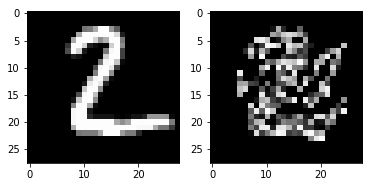

In [29]:
TestImg = torch.index_select(TestImages,0,torch.LongTensor([1]))
outputImg = model(TestImg.double())
outputImg = (outputImg*255).byte()
outputImg = outputImg.view(-1,28,28)
TestImg = TestImg.view(-1,28,28)

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,2,1)
img = np.array(TestImg.numpy())[0]
ax1.imshow(img,cmap='gray')

ax2 = fig1.add_subplot(1,2,2)
img2 = np.array(outputImg.numpy())[0]
ax2.imshow(img2,cmap='gray')





## Removing decoder and adding classification layer

In [30]:
list(model.children())

[Sequential(
   (0): Linear(in_features=784, out_features=100, bias=True)
   (1): ReLU()
 ), Sequential(
   (0): Linear(in_features=100, out_features=784, bias=True)
   (1): ReLU()
 )]

In [31]:
new_classifier = nn.Sequential(*list(model.children())[:-1])
model = new_classifier
model.add_module('classifier',nn.Sequential(nn.Linear(100,10),nn.LogSoftmax()))

print(model)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax()
  )
)


In [32]:
list(model.children())

[Sequential(
   (0): Linear(in_features=784, out_features=100, bias=True)
   (1): ReLU()
 ), Sequential(
   (0): Linear(in_features=100, out_features=10, bias=True)
   (1): LogSoftmax()
 )]

In [41]:
model[0][0]

Linear(in_features=784, out_features=100, bias=True)

In [37]:
cll_weights = copy.deepcopy(model[0][0].weight.data)
cll_weights.shape

torch.Size([100, 784])

In [39]:
init_classifier_weights = copy.deepcopy(model.classifier[0].weight.data)
init_classifier_weights.shape

torch.Size([10, 100])

In [69]:
iterations = 30
BatchSize = 1000
runningLoss =0
for epoch in range(30):
    for i in range(60):
        inputs = torch.index_select(TrainImages,0,torch.linspace(i*BatchSize,(i+1)*BatchSize - 1,steps=BatchSize)
                                      .long()).double()
        labels = torch.index_select(TrainLabels,0,torch.linspace(i*BatchSize,(i+1)*BatchSize - 1,steps=BatchSize)
                                      .long()).long()

        inputs = inputs/255
        optimizer.zero_grad()
        model.double()
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    inputs  = TestImages.double()/255
    outputs = model(inputs)
    #print('output shape',outputs.shape)
    _,predicted = torch.max(outputs.data,1)
    #print('predicted shape',predicted.shape)
    #print('test labels shape',TestLabels.shape)
    correct =0
    total =0
    total += TestLabels.size(0)
    correct += (predicted == TestLabels).sum()
    print(f"at iteration {epoch}/{iterations}; Traininf loss:{runningloss/60} testAcc :{100* correct/float(total)}")
    
print('Finished training')

/home/mech_guruprasad/.conda/envs/env_full/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


at iteration 0/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 1/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 2/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 3/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 4/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 5/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 6/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 7/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 8/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 9/30; Traininf loss:0.00944227387535478 testAcc :94
at iteration 10/30; Traininf loss:0.00944227387535478 testAcc :95
at iteration 11/30; Traininf loss:0.00944227387535478 testAcc :95
at iteration 12/30; Traininf loss:0.00944227387535478 testAcc :95
at iteration 13/30; Traininf loss:0.00944227387535478 testAcc :95
at iteration 14/30; Traininf loss:0.00944227387535478 testAcc :95
at iteration 15/30; 

In [72]:
cll_weights_after = copy.deepcopy(model[0][0].weight.data)
cll_weights_after.shape

torch.Size([100, 784])

## weigth visualisation

In [73]:
cll_weights = (1 + cll_weights)*127.5
cll_weights_after = (1 + cll_weights_after)*127.5

In [74]:
cll_weights.shape

torch.Size([100, 784])

In [75]:
cll_weights = cll_weights.view(-1,280,280).byte()
cll_weights_after = cll_weights_after.view(-1,280,280).byte()

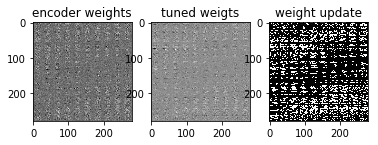

In [78]:
fig = plt.figure(1)
ax = fig.add_subplot(1,3,1)
img = np.array(cll_weights.numpy())[0]
ax.set_title('encoder weights')
ax.imshow(img,cmap='gray')

ax1 = fig.add_subplot(1,3,2)
img1 = np.array(cll_weights_after.numpy())[0]
ax1.set_title('tuned weigts')
ax1.imshow(img1,cmap='gray')

ax3 = fig.add_subplot(1,3,3)
d_weights = cll_weights - cll_weights_after
img3 = np.array(d_weights.numpy())[0]
ax3.set_title('weight update')
ax3.imshow(img3,cmap='gray')